In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Checking dataset count


In [ ]:
# Count images in each split
!echo "Train:" $(ls /content/drive/MyDrive/Nail\ object\ detection/images/train | wc -l)
!echo "Valid:" $(ls /content/drive/MyDrive/Nail\ object\ detection/images/valid | wc -l)
!echo "Test:"  $(ls /content/drive/MyDrive/Nail\ object\ detection/images/test  | wc -l)

Train: 6363
Valid: 594
Test: 307


In [ ]:
# Count labels in each split
!echo "Train:" $(ls /content/drive/MyDrive/Nail\ object\ detection/labels/train | wc -l)
!echo "Valid:" $(ls /content/drive/MyDrive/Nail\ object\ detection/labels/valid | wc -l)
!echo "Test:"  $(ls /content/drive/MyDrive/Nail\ object\ detection/labels/test  | wc -l)

Train: 6363
Valid: 594
Test: 307


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.9 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# load pretrained base model (smallest YOLOv8 for starters)
model = YOLO("yolov8n.pt")

model.train(
    data="/content/drive/MyDrive/Nail object detection/data.yaml",
    epochs=10,                     # max epochs
    patience=20,                   # stop early if no improvement for 20 epochs
    imgsz=640,
    batch=16,
    project="/content/drive/MyDrive/Nail object detection/runs",
    name="yolov8_nails"
)

Ultralytics 8.3.192 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Nail object detection/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_nails, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, p

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b2f26933b00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
from ultralytics import YOLO

model = YOLO(
    "/content/drive/MyDrive/Nail object detection/runs/yolov8_nails/weights/best.pt")

metrics = model.val(
    data="/content/drive/MyDrive/Nail object detection/data.yaml", split="test")
print(metrics)

Ultralytics 8.3.192 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.8±0.3 ms, read: 0.0±0.0 MB/s, size: 10.0 KB)
val: Scanning /content/drive/.shortcut-targets-by-id/156sJaBBNRWYUCV-pJvdFkrXd5XBDPSNF/Nail object detection/labels/test... 307 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 307/307 0.83it/s 6:09
val: New cache created: /content/drive/.shortcut-targets-by-id/156sJaBBNRWYUCV-pJvdFkrXd5XBDPSNF/Nail object detection/labels/test.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 20/20 4.6it/s 4.4s
                   all        307        314      0.718      0.671       0.62      0.234
Speed: 1.2ms preprocess, 5.3ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])

In [ ]:
# Run prediction on one image
IMG_NAME = "245_png.rf.0692fb978220d0befcc948b721ea1d2a.jpg"
results = model.predict(
    f"/content/drive/MyDrive/Nail object detection/4.png", save=True, conf=0.5)


image 1/1 /content/drive/MyDrive/Nail object detection/4.png: 640x576 1 nail, 42.7ms
Speed: 2.5ms preprocess, 42.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)
Results saved to runs/detect/predict


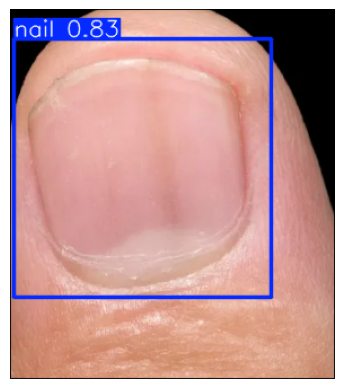

In [ ]:
import matplotlib.pyplot as plt

# Show prediction
for r in results:
    im_array = r.plot()  # plot bboxes on image (numpy array BGR)
    plt.imshow(im_array[..., ::-1])  # convert BGR → RGB
    plt.axis("off")
    plt.show()